# Team Benchmark

**Authors:** Marissa Nicole Esteban, Gabe Krishnadasan, Diana Montoya-Herrera, Gabe Seidl, Madeleine Woo, Daniel Matlock

**Date:** 10/5/2023

### Wave Height

#### Dataset: https://www.kaggle.com/code/shaltaf/the-prediction-of-significant-wave-height-hs/notebook 

## Table of Contents:
* [Data Importing and Pre-processing](#data-importing)
* [Data Analysis and Visualization](#data-vis)
* [Data Analytics](#data-analytics)

In [69]:
# import libraries needed
from seebuoy import NDBC
from IPython.display import display
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import sys
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [70]:
import pandas as pd
from seebuoy import NDBC

In [71]:
ndbc = NDBC()

In [72]:
df_avail = ndbc.available_data(station_id="44091")

In [73]:
df_data = ndbc.get_data("44065")

df_data

,wind_direction,wind_speed,wind_gust,wave_height,dominant_period,average_period,mean_wave_direction,pressure,air_temp,water_temp,dewpoint,visibility,pressure_tendency,tide
date,,,,,,,,,,,,,,
2024-03-11 00:00:00,NaN,12.0,15.0,NaN,NaN,NaN,NaN,996.2,NaN,6.3,NaN,NaN,0.9,NaN
2024-03-11 00:10:00,NaN,14.0,18.0,1.7,NaN,5.0,161.0,996.1,NaN,6.3,NaN,NaN,NaN,NaN
2024-03-11 00:20:00,NaN,14.0,18.0,1.7,9.0,5.0,161.0,996.2,NaN,6.3,NaN,NaN,NaN,NaN
2024-03-11 00:30:00,NaN,15.0,20.0,NaN,NaN,NaN,NaN,996.3,NaN,6.3,NaN,NaN,NaN,NaN
2024-03-11 00:40:00,NaN,15.0,20.0,NaN,NaN,NaN,NaN,996.6,NaN,6.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-25 20:30:00,130.0,3.0,5.0,NaN,NaN,NaN,NaN,1026.8,6.6,10.3,-1.0,NaN,NaN,NaN
2024-04-25 20:40:00,120.0,3.0,5.0,NaN,NaN,NaN,NaN,1026.8,6.5,10.3,-1.0,NaN,NaN,NaN
2024-04-25 20:50:00,130.0,4.0,5.0,1.1,6.0,5.3,101.0,1026.8,6.6,10.3,-0.4,NaN,NaN,NaN


In [74]:
# dropping cols where there is 100% NA
df_data.dropna(axis=1, how='all', inplace=True)

# dropping rows where average_period is null
df_data.dropna(subset=['average_period'], inplace=True)

# dropping rows wehre wave_height is null
df_data.dropna(subset=['wave_height'], inplace=True)

In [75]:
try:
    del df_data['pressure_tendency']
    del df_data['dewpoint']
    del df_data['air_temp']
except:
    pass

In [76]:
# missing data
total_na = df_data.isnull().sum().sort_values(ascending=False)

total_rows = df_data.isnull().count()
percent = (df_data.isnull().sum()/df_data.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total_na, total_rows, percent], axis=1, keys=['Total NA', 'Total Rows', 'Percent'])
missing_data

,Total NA,Total Rows,Percent
wind_direction,1794,2422,74.071016
dominant_period,862,2422,35.590421
water_temp,28,2422,1.156069
mean_wave_direction,16,2422,0.660611
wind_speed,13,2422,0.536746
wind_gust,13,2422,0.536746
pressure,13,2422,0.536746
wave_height,0,2422,0.000000
average_period,0,2422,0.000000


In [77]:
df_data

,wind_direction,wind_speed,wind_gust,wave_height,dominant_period,average_period,mean_wave_direction,pressure,water_temp
date,,,,,,,,,
2024-03-11 00:10:00,NaN,14.0,18.0,1.7,NaN,5.0,161.0,996.1,6.3
2024-03-11 00:20:00,NaN,14.0,18.0,1.7,9.0,5.0,161.0,996.2,6.3
2024-03-11 00:50:00,NaN,15.0,18.0,1.9,10.0,4.9,126.0,996.7,6.3
2024-03-11 01:10:00,NaN,14.0,18.0,1.9,NaN,5.0,134.0,997.0,6.3
2024-03-11 01:20:00,NaN,14.0,18.0,1.9,9.0,5.0,134.0,997.1,6.3
...,...,...,...,...,...,...,...,...,...
2024-04-25 19:50:00,130.0,5.0,6.0,1.1,9.0,5.2,97.0,1026.8,10.4
2024-04-25 20:10:00,130.0,4.0,5.0,1.2,NaN,5.4,100.0,1026.8,10.3
2024-04-25 20:20:00,130.0,4.0,5.0,1.2,7.0,5.4,100.0,1026.8,10.3


In [78]:
df_data = df_data.reset_index()
#ny_buoy["average_period_0_for_null"] = ny_buoy["average_period"].fillna(0)

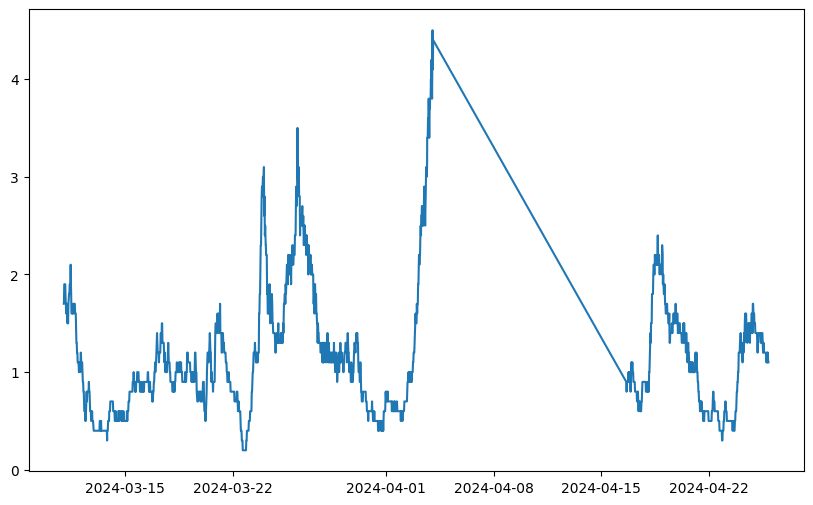

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(df_data["date"], df_data["wave_height"]) # including NULL values

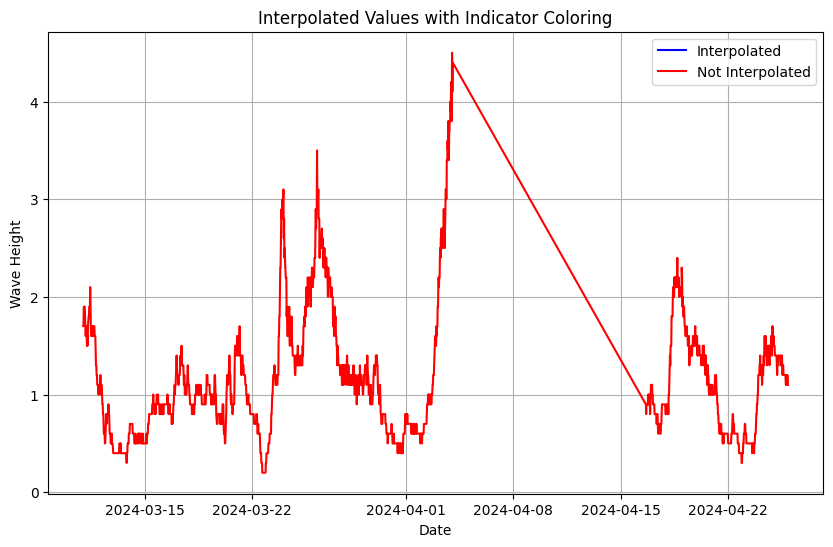

In [80]:
# lets limit the df to 2 columns: date and wave height
ny_buoy_df = df_data[["date","wave_height"]]

# Set 'date' column as the index
ny_buoy_df = ny_buoy_df.set_index("date")

ny_buoy_df['wave_height_interpolated'] = ny_buoy_df['wave_height'].interpolate(method='time') # interpolate missing values based on time
ny_buoy_df['interpolation_indicator'] = ny_buoy_df['wave_height'].isna()

ny_buoy_df = ny_buoy_df.reset_index()

plt.figure(figsize=(10, 6))
#plt.plot(ny_buoy_df["average_period"]) # interpolated NULL values

plt.plot(ny_buoy_df['date'][ny_buoy_df['interpolation_indicator']], ny_buoy_df['wave_height_interpolated'][ny_buoy_df['interpolation_indicator']], color='blue', label='Interpolated')
plt.plot(ny_buoy_df['date'], ny_buoy_df['wave_height'], color='red', label='Not Interpolated')

plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Interpolated Values with Indicator Coloring')
plt.legend()

plt.grid(True)
plt.show()

In [81]:
# lets use the interpolated values and see how good we are at modeling the future
from prophet import Prophet

In [82]:
modeling_df = ny_buoy_df[["date","wave_height_interpolated"]]
modeling_df = modeling_df.rename(columns={"date": "ds", "wave_height_interpolated": "y"})

# Initialize Prophet model
model = Prophet()
model.fit(modeling_df)

14:51:05 - cmdstanpy - INFO - Chain [1] start processing
14:51:05 - cmdstanpy - INFO - Chain [1] done processing


In [83]:
future = model.make_future_dataframe(periods=20)
forecast = model.predict(future)

In [84]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-03-11 00:10:00,1.497497,0.781873,1.967795,1.497497,1.497497,-0.118363,-0.118363,-0.118363,0.044332,0.044332,0.044332,-0.162695,-0.162695,-0.162695,0.0,0.0,0.0,1.379134
1,2024-03-11 00:20:00,1.495339,0.749951,1.996254,1.495339,1.495339,-0.120672,-0.120672,-0.120672,0.042868,0.042868,0.042868,-0.163540,-0.163540,-0.163540,0.0,0.0,0.0,1.374667
2,2024-03-11 00:50:00,1.488867,0.764738,1.936362,1.488867,1.488867,-0.128413,-0.128413,-0.128413,0.037508,0.037508,0.037508,-0.165921,-0.165921,-0.165921,0.0,0.0,0.0,1.360454
3,2024-03-11 01:10:00,1.484553,0.755940,1.930634,1.484553,1.484553,-0.134112,-0.134112,-0.134112,0.033269,0.033269,0.033269,-0.167380,-0.167380,-0.167380,0.0,0.0,0.0,1.350441
4,2024-03-11 01:20:00,1.482396,0.732137,1.962318,1.482396,1.482396,-0.137085,-0.137085,-0.137085,0.030987,0.030987,0.030987,-0.168072,-0.168072,-0.168072,0.0,0.0,0.0,1.345311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,2024-05-11 21:10:00,0.261743,-3.369880,4.316687,-3.468084,4.078364,0.143287,0.143287,0.143287,0.023446,0.023446,0.023446,0.119841,0.119841,0.119841,0.0,0.0,0.0,0.405030
2438,2024-05-12 21:10:00,0.221414,-4.031132,4.259315,-3.802842,4.491558,-0.119635,-0.119635,-0.119635,0.023446,0.023446,0.023446,-0.143082,-0.143082,-0.143082,0.0,0.0,0.0,0.101778
2439,2024-05-13 21:10:00,0.181085,-4.527048,4.864281,-4.267196,4.917927,-0.115624,-0.115624,-0.115624,0.023446,0.023446,0.023446,-0.139070,-0.139070,-0.139070,0.0,0.0,0.0,0.065461
2440,2024-05-14 21:10:00,0.140755,-4.880562,4.981872,-4.718873,5.169054,-0.062744,-0.062744,-0.062744,0.023446,0.023446,0.023446,-0.086190,-0.086190,-0.086190,0.0,0.0,0.0,0.078011


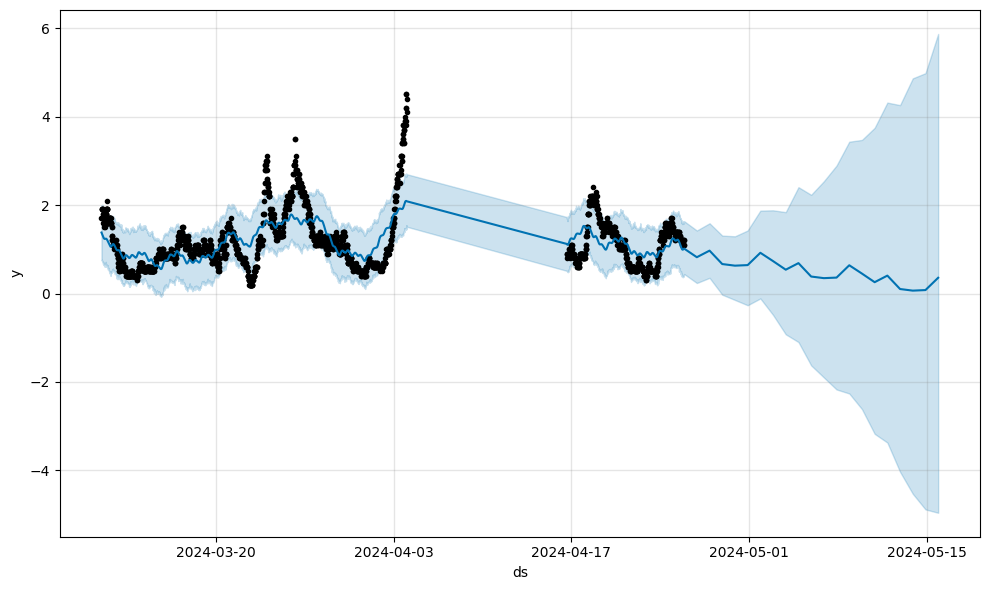

In [85]:
fig1 = model.plot(forecast)

In [86]:
today = pd.Timestamp.today() + timedelta(days=1)
future = forecast[forecast['ds'] > today]

In [87]:
future

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2422,2024-04-26 21:10:00,0.866681,0.237783,1.424807,0.824416,0.900818,-0.045565,-0.045565,-0.045565,0.023446,0.023446,0.023446,-0.069011,-0.069011,-0.069011,0.0,0.0,0.0,0.821117
2423,2024-04-27 21:10:00,0.826352,0.354390,1.588287,0.686508,0.942943,0.143287,0.143287,0.143287,0.023446,0.023446,0.023446,0.119841,0.119841,0.119841,0.0,0.0,0.0,0.969639
2424,2024-04-28 21:10:00,0.786023,-0.026693,1.309625,0.513748,1.032457,-0.119635,-0.119635,-0.119635,0.023446,0.023446,0.023446,-0.143082,-0.143082,-0.143082,0.0,0.0,0.0,0.666388
2425,2024-04-29 21:10:00,0.745694,-0.145297,1.293896,0.306082,1.139370,-0.115624,-0.115624,-0.115624,0.023446,0.023446,0.023446,-0.139070,-0.139070,-0.139070,0.0,0.0,0.0,0.630070
2426,2024-04-30 21:10:00,0.705364,-0.265006,1.424901,0.086749,1.278009,-0.062744,-0.062744,-0.062744,0.023446,0.023446,0.023446,-0.086190,-0.086190,-0.086190,0.0,0.0,0.0,0.642620
2427,2024-05-01 21:10:00,0.665035,-0.111098,1.874371,-0.154941,1.422653,0.256077,0.256077,0.256077,0.023446,0.023446,0.023446,0.232631,0.232631,0.232631,0.0,0.0,0.0,0.921112
2428,2024-05-02 21:10:00,0.624706,-0.484206,1.881554,-0.440186,1.585900,0.108327,0.108327,0.108327,0.023446,0.023446,0.023446,0.084881,0.084881,0.084881,0.0,0.0,0.0,0.733033
2429,2024-05-03 21:10:00,0.584377,-0.922049,1.839883,-0.716172,1.788455,-0.045565,-0.045565,-0.045565,0.023446,0.023446,0.023446,-0.069011,-0.069011,-0.069011,0.0,0.0,0.0,0.538812
2430,2024-05-04 21:10:00,0.544048,-1.097274,2.404344,-1.047758,2.026780,0.143287,0.143287,0.143287,0.023446,0.023446,0.023446,0.119841,0.119841,0.119841,0.0,0.0,0.0,0.687335
2431,2024-05-05 21:10:00,0.503718,-1.624918,2.231937,-1.358839,2.261828,-0.119635,-0.119635,-0.119635,0.023446,0.023446,0.023446,-0.143082,-0.143082,-0.143082,0.0,0.0,0.0,0.384083


In [88]:
from datetime import datetime, timedelta

html = "{:<30} {:<30} {:<10}".format("Date", "Wave Height Forecasted (m)", "yhat upper / yhat lower<br /><br /><br />")

print("{:<30} {:<30} {:<10}".format("Date", "Wave Height Forecasted (m)", "yhat upper / yhat lower"))
print()
for index, row in future.iterrows():
     day = datetime.strptime(str(row['ds']), "%Y-%m-%d %H:%M:%S").strftime("%A %B %d")
     high_low = str(round(row['yhat_lower'],2))+" / "+ str(round(row['yhat_upper'],2))
     predicted = str(round(row['yhat'],2))
     print("{:<30} {:<30} {:<10}".format(day, predicted, high_low ))

     html += "{:<30} {:<30} {:<10}<br />".format(day, predicted, high_low)

Date                           Wave Height Forecasted (m)     yhat upper / yhat lower

Friday April 26                0.82                           0.24 / 1.42
Saturday April 27              0.97                           0.35 / 1.59
Sunday April 28                0.67                           -0.03 / 1.31
Monday April 29                0.63                           -0.15 / 1.29
Tuesday April 30               0.64                           -0.27 / 1.42
Wednesday May 01               0.92                           -0.11 / 1.87
Thursday May 02                0.73                           -0.48 / 1.88
Friday May 03                  0.54                           -0.92 / 1.84
Saturday May 04                0.69                           -1.1 / 2.4
Sunday May 05                  0.38                           -1.62 / 2.23
Monday May 06                  0.35                           -1.9 / 2.54
Tuesday May 07                 0.36                           -2.17 / 2.89
Wednesday May 08  

In [89]:
opening = "<!DOCTYPE html><html><head><title>Predictions</title></head><body><h1>Predictions</h1><p>"
closing = "</p></body></html>"

html_output = opening + html + closing

with open("output_html.html", "w") as file:
    file.write(html_output)

# LINEAR REGRESSION

In [90]:
import output_script

In [95]:
linear_prediction, rf_predictions = output_script.get_predictions()

Test with interpolation imputation



,date,wave_height,dominant_period,average_period,mean_wave_direction,water_temp
0,2024-03-11 00:26:00,2.1,5,5.2,275,6.5
1,2024-03-11 00:56:00,2.3,5,4.9,265,6.5
2,2024-03-11 01:26:00,2.2,5,5.0,268,6.5
3,2024-03-11 01:56:00,2.2,5,4.9,278,6.5
4,2024-03-11 02:26:00,2.3,5,5.1,281,6.5
...,...,...,...,...,...,...
2162,2024-04-25 19:26:00,1.4,6,4.9,70,9.6
2163,2024-04-25 19:56:00,1.4,6,5.0,76,9.6
2164,2024-04-25 20:26:00,1.4,6,5.0,74,9.6
2165,2024-04-25 20:56:00,1.4,7,5.2,88,9.5


TRAIN MODEL DEBUG


,date,wave_height,dominant_period,average_period,mean_wave_direction,water_temp
0,2024-03-11 00:26:00,2.1,5,5.2,275,6.5
1,2024-03-11 00:56:00,2.3,5,4.9,265,6.5
2,2024-03-11 01:26:00,2.2,5,5.0,268,6.5
3,2024-03-11 01:56:00,2.2,5,4.9,278,6.5
4,2024-03-11 02:26:00,2.3,5,5.1,281,6.5
...,...,...,...,...,...,...
2162,2024-04-25 19:26:00,1.4,6,4.9,70,9.6
2163,2024-04-25 19:56:00,1.4,6,5.0,76,9.6
2164,2024-04-25 20:26:00,1.4,6,5.0,74,9.6
2165,2024-04-25 20:56:00,1.4,7,5.2,88,9.5


DEBUG TIME SERIES SPLIT


,date,wave_height,dominant_period,average_period,mean_wave_direction,water_temp
0,2024-03-11 00:26:00,2.1,5,5.2,275,6.5
1,2024-03-11 00:56:00,2.3,5,4.9,265,6.5
2,2024-03-11 01:26:00,2.2,5,5.0,268,6.5
3,2024-03-11 01:56:00,2.2,5,4.9,278,6.5
4,2024-03-11 02:26:00,2.3,5,5.1,281,6.5
...,...,...,...,...,...,...
2162,2024-04-25 19:26:00,1.4,6,4.9,70,9.6
2163,2024-04-25 19:56:00,1.4,6,5.0,76,9.6
2164,2024-04-25 20:26:00,1.4,6,5.0,74,9.6
2165,2024-04-25 20:56:00,1.4,7,5.2,88,9.5


EXTENDED DATA AFTER HANDLING MISSING


,date,wave_height,dominant_period,average_period,mean_wave_direction,water_temp
0,2024-03-11 00:26:00,2.1,5.0,5.2,275,6.5
1,2024-03-11 00:56:00,2.3,5.0,4.9,265,6.5
2,2024-03-11 01:26:00,2.2,5.0,5.0,268,6.5
3,2024-03-11 01:56:00,2.2,5.0,4.9,278,6.5
4,2024-03-11 02:26:00,2.3,5.0,5.1,281,6.5
...,...,...,...,...,...,...
2162,2024-04-25 19:26:00,1.4,6.0,4.9,70,9.6
2163,2024-04-25 19:56:00,1.4,6.0,5.0,76,9.6
2164,2024-04-25 20:26:00,1.4,6.0,5.0,74,9.6
2165,2024-04-25 20:56:00,1.4,7.0,5.2,88,9.5


DEBUG TIME SERIES SPLIT


,date,wave_height,dominant_period,average_period,mean_wave_direction,water_temp
0,2024-03-11 00:26:00,2.1,5,5.2,275,6.5
1,2024-03-11 00:56:00,2.3,5,4.9,265,6.5
2,2024-03-11 01:26:00,2.2,5,5.0,268,6.5
3,2024-03-11 01:56:00,2.2,5,4.9,278,6.5
4,2024-03-11 02:26:00,2.3,5,5.1,281,6.5
...,...,...,...,...,...,...
2162,2024-04-25 19:26:00,1.4,6,4.9,70,9.6
2163,2024-04-25 19:56:00,1.4,6,5.0,76,9.6
2164,2024-04-25 20:26:00,1.4,6,5.0,74,9.6
2165,2024-04-25 20:56:00,1.4,7,5.2,88,9.5


EXTENDED DATA AFTER HANDLING MISSING


,date,wave_height,dominant_period,average_period,mean_wave_direction,water_temp
0,2024-03-11 00:26:00,2.1,5.0,5.2,275,6.5
1,2024-03-11 00:56:00,2.3,5.0,4.9,265,6.5
2,2024-03-11 01:26:00,2.2,5.0,5.0,268,6.5
3,2024-03-11 01:56:00,2.2,5.0,4.9,278,6.5
4,2024-03-11 02:26:00,2.3,5.0,5.1,281,6.5
...,...,...,...,...,...,...
2162,2024-04-25 19:26:00,1.4,6.0,4.9,70,9.6
2163,2024-04-25 19:56:00,1.4,6.0,5.0,76,9.6
2164,2024-04-25 20:26:00,1.4,6.0,5.0,74,9.6
2165,2024-04-25 20:56:00,1.4,7.0,5.2,88,9.5



Linear Predictions



,date,prediction
0,2024-04-25 14:54:49.320443,0.463009
1,2024-04-25 15:54:49.320443,0.450728
2,2024-04-25 16:54:49.320443,0.451696
3,2024-04-25 17:54:49.320443,0.464946
4,2024-04-25 18:54:49.320443,0.434320
...,...,...
332,2024-05-09 10:54:49.320443,0.444114
333,2024-05-09 11:54:49.320443,0.470127
334,2024-05-09 12:54:49.320443,0.464013
335,2024-05-09 13:54:49.320443,0.522294



Random Forest Predictions



,date,prediction
0,2024-04-25 14:54:49.320443,0.661195
1,2024-04-25 15:54:49.320443,0.658508
2,2024-04-25 16:54:49.320443,0.658508
3,2024-04-25 17:54:49.320443,0.661195
4,2024-04-25 18:54:49.320443,0.658508
...,...,...
332,2024-05-09 10:54:49.320443,0.649268
333,2024-05-09 11:54:49.320443,0.651345
334,2024-05-09 12:54:49.320443,0.651345
335,2024-05-09 13:54:49.320443,0.650524


In [94]:
linear_prediction

,date,prediction
0,2024-04-25 14:52:20.175065,0.463009
1,2024-04-25 15:52:20.175065,0.450728
2,2024-04-25 16:52:20.175065,0.451696
3,2024-04-25 17:52:20.175065,0.464946
4,2024-04-25 18:52:20.175065,0.434320
...,...,...
332,2024-05-09 10:52:20.175065,0.444114
333,2024-05-09 11:52:20.175065,0.470127
334,2024-05-09 12:52:20.175065,0.464013
335,2024-05-09 13:52:20.175065,0.522294


In [93]:
print("{:<30} {:<30} {:<10}".format("Date", "Wave Height Forecasted (m)", "yhat upper / yhat lower"))
print()
today = pd.Timestamp.today()

for i in range(15, 0, -1):
    days_ago = today - timedelta(days=i)

    # Filter DataFrame to get data from i days ago
    future = linear_prediction[linear_prediction['date'] == days_ago]
    day = datetime.strptime(str(linear_prediction['date']), "%Y-%m-%d %H:%M:%S").strftime("%A %B %d")
    print(day)

Date                           Wave Height Forecasted (m)     yhat upper / yhat lower



ValueError: time data '0     2024-04-25 14:52:20.175065\n1     2024-04-25 15:52:20.175065\n2     2024-04-25 16:52:20.175065\n3     2024-04-25 17:52:20.175065\n4     2024-04-25 18:52:20.175065\n                 ...            \n332   2024-05-09 10:52:20.175065\n333   2024-05-09 11:52:20.175065\n334   2024-05-09 12:52:20.175065\n335   2024-05-09 13:52:20.175065\n336   2024-05-09 14:52:20.175065\nName: date, Length: 337, dtype: datetime64[ns]' does not match format '%Y-%m-%d %H:%M:%S'